# This example shows how to calculate all possible matches for Cpxs and Opxs, where there aren't clear touching pairs.
- E.g., inputting all measured Cpxs from a lava sample, all measured Opxs, and wanting to assess which ones are in equilibrium. This is adapted from the method of Neave et al. (2017) used to assess all possible Cpx-Liq pairs
- Say you input Opx compositions you have measured on the probe in one sheet of an excel spreadsheet, and a set of Cpx compositions in another sheet
- You can either have a column termed "Sample_ID_Cpx" and "Sample_ID_Opx", or python will add a sample ID based on the row number (starting at 0 of course, because this is python)

In [1]:
# Loading python things
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None
import inspect
from functools import partial
import warnings as w
w.filterwarnings("ignore", message="rubicon.objc.ctypes_patch has only been tested ")
w.filterwarnings("ignore", message="The handle")

## Step 1 - Load in these different sheets

In [2]:
# This is the first sheet with Opxs
out_opxsheet=pt.import_excel('Two_pyroxene_input.xlsx', sheet_name="Opx")
Opxs2=out_opxsheet['Opxs']
# This is the second sheet with cpxs
out_cpxsheet=pt.import_excel('Two_pyroxene_input.xlsx', sheet_name="Cpx")
Cpxs2=out_cpxsheet['Cpxs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#  Inspect your inputs to check they have been read in properly
display(Opxs2.head())
display(Cpxs2.head())

,SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Sample_ID_Opx
0,55.00,0.34,1.50,11.30,0.24,30.70,0.90,0.01,0,0.19,0
1,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0,0.00,1
2,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0,0.02,2
3,55.15,0.17,1.19,10.21,0.22,29.99,1.66,0.03,0,0.15,3
4,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0,0.16,4


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0,0.58,0
1,51.70,0.28,8.38,6.69,0.15,21.40,11.70,0.64,0,0.05,1
2,51.50,0.45,8.10,6.96,0.17,20.30,12.60,0.56,0,0.09,2
3,51.06,0.62,3.16,6.18,0.12,15.78,20.82,0.27,0,0.01,3
4,53.32,0.48,2.25,5.92,0.15,16.91,20.73,0.28,0,0.12,4


## Assesing all possible combinations
- The function "calculate_cpx_opx_press_temp_matching" first makes a dataframe which contains all possible Cpx-Opx combinations. This could be very large if you enter hundreds at a time. This is fine, just be aware the calculations may take a minute or so
- As with the functions above, you need to specify your opx_comps= and cpx_comps= the names of your two inputs above
- You then also need to specify an equationT and an equationP
- You then have various options to filter outputs. If you enter nothing else, it will return pressures and temperatures for all Cpx-Opx matches. However, some of these are probably not in equilibrium
- The function also has an option to filter based on the KdFe-Mg equilibrium between Cpx and Opx. 
- If you enter KdMatch="Subsolidus" it will only return pressures and temperatures for Cpx-Opx pairs which have Kd-Fe-Mg (Cpx-opx) within the 0.7+-0.2 suggested by Putirka
- If you enter Kd Match="HighTemp" it will only return pressures and temperatures for Cpx-Opx pairs which have Kd-Fe-Mg (cpx-opx) within the 1.09+-0.14 suggested by Putirka
- If you want more flexibility still, you can enter KdMatch=, and KdErr=, which will accept all pairs with a Kd value of say KdMatch, +-KdErr
- The function then returns a dictionary. Within this dictionary are 2 different types of outputs
- "Av_PTs_perCPX" - Averages the pressures and temperatures for all the matches for a given cpx (Similar to the method used for Cpx-Liq by Neave and Putirka (2017)
- "All_PTs" returns all matches which have passed the Kd filters (if any were specified)

## Example 1
- Solve PT for all Cpx-Opx pairs, with no Kd filter using equation 39 of Putirka for P, and 36 for T

In [6]:
# This returns a dictionary called MatchOut
MatchOut=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", equationT="T_Put2008_eq36")
# These two lines split the dictionary into two dataframes
Av_Cpxs=MatchOut['Av_PTs_perCPX']
All_matches=MatchOut['All_PTs']
All_matches

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 437 Liq-Cpx pairs, be patient if this is >>1 million!
No Kd selected, all matches are shown
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,P_kbar_calc,T_K_calc,Equation Choice (T),Equation Choice (P),SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,SiO2_Opx_cat_6ox,MgO_Opx_cat_6ox,FeOt_Opx_cat_6ox,CaO_Opx_cat_6ox,Al2O3_Opx_cat_6ox,Na2O_Opx_cat_6ox,K2O_Opx_cat_6ox,MnO_Opx_cat_6ox,TiO2_Opx_cat_6ox,Cr2O3_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,Cation_Sum_Opx,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,SiO2_Cpx_cat_6ox,MgO_Cpx_cat_6ox,FeOt_Cpx_cat_6ox,CaO_Cpx_cat_6ox,Al2O3_Cpx_cat_6ox,Na2O_Cpx_cat_6ox,K2O_Cpx_cat_6ox,MnO_Cpx_cat_6ox,TiO2_Cpx_cat_6ox,Cr2O3_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,Cation_Sum_Cpx,CrCaTs,a_cpx_En,Mgno_CPX,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,ID_CPX
0,0,0,0.834684,3.380885,1258.526669,T_Put2008_eq36,P_Put2008_eq39,55.00,0.34,1.50,11.30,0.24,30.70,0.90,0.01,0.0,0.19,1.943665,1.617356,0.333959,0.034078,0.062475,0.000685,0.0,0.007184,0.009038,0.005308,0.0,0.056335,0.006140,1.952703,4.013748,0.000685,0.009038,0.005308,0.000146,0.034078,0.957618,0.790815,0.028142,0.828850,0.0,52.30,0.70,3.00,5.1,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0
1,1,0,1.065157,13.493433,1403.925666,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,4.012245,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.30,0.70,3.00,5.1,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0
2,2,0,1.019441,11.274875,1397.201768,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,4.008433,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.30,0.70,3.00,5.1,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0
3,3,0,0.902429,4.601071,1294.454439,T_Put2008_eq36,P_Put2008_eq39,55.15,0.17,1.19,10.21,0.22,29.99,1.66,0.03,0.0,0.15,1.968730,1.595973,0.304805,0.063492,0.050066,0.002076,0.0,0.006652,0.004565,0.004233,0.0,0.031270,0.018796,1.973295,4.000594,0.002076,0.004565,0.004233,0.012486,0.063492,0.913443,0.764291,0.053125,0.839637,3.0,52.30,0.70,3.00,5.1,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0
4,4,0,0.932864,5.280842,1275.837500,T_Put2008_eq36,P_Put2008_eq39,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0.0,0.16,1.971271,1.611274,0.297687,0.039377,0.058165,0.001357,0.0,0.007708,0.003423,0.004427,0.0,0.028729,0.029435,1.974693,3.994689,0.001357,0.003423,0.004427,0.023651,0.039377,0.925110,0.777706,0.033103,0.844054,4.0,52.30,0.70,3.00,5.1,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Example 2
- Apply the high temperature KD filter suggested by Putirka (2008)

In [7]:
MatchOut_HighTKdFilt=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", equationT="T_Put2008_eq36", KdMatch="HighTemp")
# These two lines split the dictionary into two dataframes
Av_Cpxs_HighTKdFilt=MatchOut_HighTKdFilt['Av_PTs_perCPX']
All_matches_HighTKdFilt=MatchOut_HighTKdFilt['All_PTs']
All_matches_HighTKdFilt

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 437 Liq-Cpx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,P_kbar_calc,T_K_calc,Equation Choice (T),Equation Choice (P),SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,SiO2_Opx_cat_6ox,MgO_Opx_cat_6ox,FeOt_Opx_cat_6ox,CaO_Opx_cat_6ox,Al2O3_Opx_cat_6ox,Na2O_Opx_cat_6ox,K2O_Opx_cat_6ox,MnO_Opx_cat_6ox,TiO2_Opx_cat_6ox,Cr2O3_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,Cation_Sum_Opx,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,SiO2_Cpx_cat_6ox,MgO_Cpx_cat_6ox,FeOt_Cpx_cat_6ox,CaO_Cpx_cat_6ox,Al2O3_Cpx_cat_6ox,Na2O_Cpx_cat_6ox,K2O_Cpx_cat_6ox,MnO_Cpx_cat_6ox,TiO2_Cpx_cat_6ox,Cr2O3_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,Cation_Sum_Cpx,CrCaTs,a_cpx_En,Mgno_CPX,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,ID_CPX,Delta_Kd_Fe_Mg_Cpx_Opx
1,1,0,1.065157,13.493433,1403.925666,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,4.012245,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0,0.024843
2,2,0,1.019441,11.274875,1397.201768,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,4.008433,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0,0.070559
17,17,0,1.145797,13.885440,1413.703369,T_Put2008_eq36,P_Put2008_eq39,52.60,0.28,8.60,7.91,0.12,29.50,2.11,0.15,0.0,0.00,1.814573,1.517118,0.228203,0.077991,0.349659,0.010033,0.0,0.003506,0.007266,0.000000,0.0,0.185427,0.164232,1.821839,4.008348,0.010033,0.007266,0.000000,0.154199,0.077991,0.754686,0.654694,0.067658,0.869245,17.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0,0.055797
18,18,0,1.101575,12.434324,1438.940404,T_Put2008_eq36,P_Put2008_eq39,52.95,0.52,7.43,8.01,0.00,28.72,1.93,0.27,0.0,0.16,1.848702,1.494838,0.233878,0.072199,0.305736,0.018277,0.0,0.000000,0.013656,0.004416,0.0,0.151298,0.154439,1.862359,3.991704,0.018277,0.013656,0.004416,0.131745,0.072199,0.755558,0.653338,0.062431,0.864706,18.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0,0.011575
20,1,1,1.083837,15.878754,1577.081747,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,4.012245,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,51.70,0.28,8.38,6.69,0.15,21.40,11.70,0.64,0.0,0.05,1.830350,1.129447,0.198073,0.443816,0.349659,0.043931,0.0,0.004498,0.007456,0.001399,0.0,0.169650,0.180009,4.008630,0.000700,0.411086,0.850790,0.043931,0.136078,0.016786,0.290252,0.518634,0.290252,0.246111,1.0,0.006163
...,...,...,...,...,...,...,...,...,.

## Example 3
- Apply a Kd filter of 1+-0.08

In [8]:
MatchOut_KdFilt2=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", equationT="T_Put2008_eq36", KdMatch=1, KdErr=0.08)
# These two lines split the dictionary into two dataframes
Av_Cpxs_KdFilt2=MatchOut_KdFilt2['Av_PTs_perCPX']
All_matches_KdFilt2=MatchOut_KdFilt2['All_PTs']
All_matches_KdFilt2.head()

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 437 Liq-Cpx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,P_kbar_calc,T_K_calc,Equation Choice (T),Equation Choice (P),SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,SiO2_Opx_cat_6ox,MgO_Opx_cat_6ox,FeOt_Opx_cat_6ox,CaO_Opx_cat_6ox,Al2O3_Opx_cat_6ox,Na2O_Opx_cat_6ox,K2O_Opx_cat_6ox,MnO_Opx_cat_6ox,TiO2_Opx_cat_6ox,Cr2O3_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,Cation_Sum_Opx,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,SiO2_Cpx_cat_6ox,MgO_Cpx_cat_6ox,FeOt_Cpx_cat_6ox,CaO_Cpx_cat_6ox,Al2O3_Cpx_cat_6ox,Na2O_Cpx_cat_6ox,K2O_Cpx_cat_6ox,MnO_Cpx_cat_6ox,TiO2_Cpx_cat_6ox,Cr2O3_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,Cation_Sum_Cpx,CrCaTs,a_cpx_En,Mgno_CPX,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,ID_CPX,Delta_Kd_Fe_Mg_Cpx_Opx
1,1,0,1.065157,13.493433,1403.925666,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,4.012245,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.3,0.70,3.00,5.10,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0,0.065157
2,2,0,1.019441,11.274875,1397.201768,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,4.008433,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.3,0.70,3.00,5.10,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0,0.019441
4,4,0,0.932864,5.280842,1275.837500,T_Put2008_eq36,P_Put2008_eq39,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0.0,0.16,1.971271,1.611274,0.297687,0.039377,0.058165,0.001357,0.0,0.007708,0.003423,0.004427,0.0,0.028729,0.029435,1.974693,3.994689,0.001357,0.003423,0.004427,0.023651,0.039377,0.925110,0.777706,0.033103,0.844054,4.0,52.3,0.70,3.00,5.10,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.0,0.067136
21,2,1,1.037319,14.800255,1577.779664,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,4.008433,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,51.7,0.28,8.38,6.69,0.15,21.4,11.7,0.64,0.0,0.05,1.830350,1.129447,0.198073,0.443816,0.349659,0.043931,0.0,0.004498,0.007456,0.001399,0.0,0.169650,0.180009,4.008630,0.000700,0.411086,0.850790,0.043931,0.136078,0.016786,0.290252,0.518634,0.290252,0.246111,1.0,0.037319
23,4,1,0.949224,-6.331383,1325.925604,T_Put2008_eq36,P_Put2008_eq39,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0.0,0.16,1.971271,1.611274,0.297687,0.039377,0.058165,0.001357,0.0,0.007708,0.003423,0.004427,0.0,0.028729,0.029435,1.974693,3.994689,0.001357,0.003423,0.004427,0.023651,0.039377,0.925110,0.777706,0.033103,0.844054,4.0,51.7,0.28,8.38,6.69,0.15,21.4,11.7,0.64,0.0,0.05,1.830350,1.129447,0.198073,0.443816,0.349659,0.043931,0.0,0.004498,0.007456,0.001399,0.0,0.169650,0.180009,4.008630,0.000700,0.411086,0.850790,0.043931,0.136078,0.016786,0.290252,0.518634,0.290252,0.246111,1.0,0.050776


# Plot showing the different distributions of pressures

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


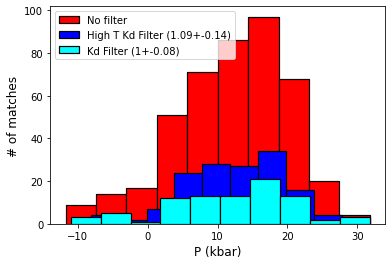

In [9]:
plt.hist(All_matches['P_kbar_calc'], facecolor='r', edgecolor='black', 
         linewidth=1.2, label='No filter')
plt.hist(All_matches_HighTKdFilt['P_kbar_calc'], facecolor='b', edgecolor='black', 
         linewidth=1.2, label='High T Kd Filter (1.09+-0.14)')
plt.hist(All_matches_KdFilt2['P_kbar_calc'], facecolor='cyan', edgecolor='black', 
         linewidth=1.2, label='Kd Filter (1+-0.08)')

plt.xlabel('P (kbar)', fontsize=12)
plt.ylabel('# of matches', fontsize=12)
plt.legend()

## Can save anything to excel....

In [10]:
All_matches.to_excel('AllMatches.xlsx')